In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("TSLA.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2843 non-null   object 
 1   Open       2843 non-null   float64
 2   High       2843 non-null   float64
 3   Low        2843 non-null   float64
 4   Close      2843 non-null   float64
 5   Adj Close  2843 non-null   float64
 6   Volume     2843 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.6+ KB


<Axes: xlabel='Date'>

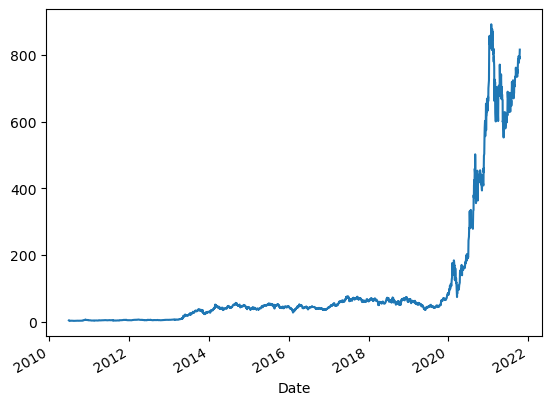

In [21]:
# Definindo o índice do dataframe de acordo com a data das ações
df.Date = pd.to_datetime(df['Date'])
df.set_index(df['Date'], inplace=True)

df.Open.plot()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

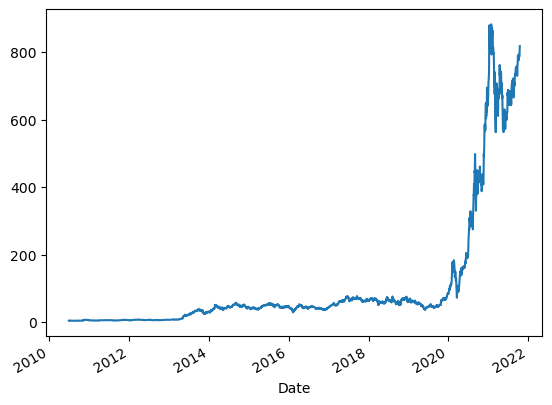

In [23]:
df.Close.plot()
df.columns

In [25]:
# Transformando os dados pelo método .shift, onde passo o valor no ponto X_2 para X_2-1 (basicamente passo os valores para trás)
df['Close_Anterior'] = df['Close'].shift(1)
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Anterior
Date,,,,,,,,
2010-07-02,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,4.392
2010-07-06,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,3.840
2010-07-07,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500,3.222
2010-07-08,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000,3.160
2010-07-09,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000,3.492


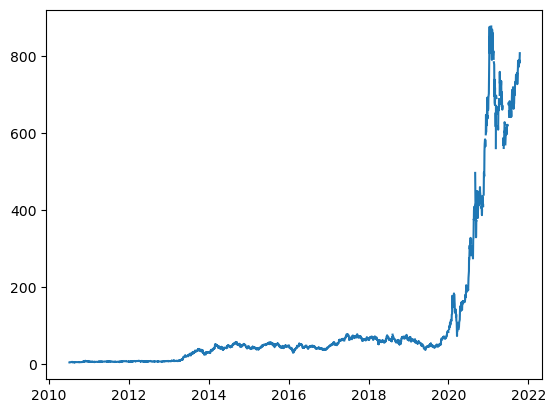

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(df['Close_Anterior'])
y = pd.DataFrame(df['Close'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transforma os dados de modo que a média fique centrada em 0 e o desvio padrão seja 1.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Fazendo previsões

y_resultados = model.predict(X_test_scaled)
df['predict'] = pd.Series(y_resultados.flatten(), index=y_test.index)
plt.plot(df.predict)

In [29]:
from sklearn.metrics import r2_score

# Métrica para avaliar o modelo.
r2 = r2_score(y_test, y_resultados)
r2

0.9982961811441395

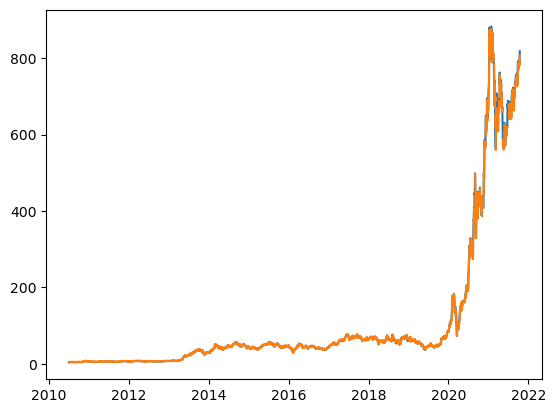

In [31]:
plt.plot(df.Close)
plt.plot(df.predict)